Hipótesis: Impacto de la instalación de heladeras de la marca CEPITA en el SOVI de una empresa de bebidas

En este estudio, planteamos la hipótesis de que la instalación de heladeras de la marca CEPITA en puntos de venta de una empresa de bebidas aumentará significativamente el Share of Visible Inventory (SOVI) en comparación con la competencia. Nuestro objetivo es determinar si los clientes que cuentan con heladeras de CEPITA presentan un mejor desempeño en términos de SOVI en comparación con aquellos que no las tienen instaladas.

La razón detrás de esta hipótesis radica en la premisa de que la presencia de heladeras de CEPITA en los puntos de venta puede aumentar la visibilidad y disponibilidad de los productos, lo que potencialmente podría incrementar su participación en el inventario visible. La inversión en la instalación de estas heladeras se plantea como una estrategia para mejorar la presencia de la marca en el mercado y aumentar las ventas.

Además, nos proponemos analizar el impacto específico de esta mejora en el SOVI, tanto en el entorno frío como en el ambiente. La detección de diferencias significativas en estos dos contextos nos permitirá comprender mejor en qué condiciones la instalación de heladeras de CEPITA tiene un impacto más positivo en la participación de inventario visible.

Una vez confirmada nuestra hipótesis, nuestro siguiente paso será identificar qué clientes son los más adecuados y productivos para la instalación de heladeras de CEPITA. Esto nos permitirá optimizar la asignación de recursos y enfocar nuestras inversiones de manera estratégica para maximizar el retorno de la inversión y mejorar la presencia de la marca en el mercado.

En resumen, este estudio tiene como objetivo demostrar que la instalación de heladeras de la marca CEPITA en los puntos de venta de una empresa de bebidas tiene un impacto positivo en el SOVI, tanto en el entorno frío como en el ambiente, lo que justifica la inversión en la compra y colocación estratégica de estas heladeras como una medida para impulsar las ventas y fortalecer la posición de la marca en el mercado.





### Glosario de Términos

1. **SOVI (Share of Visible Inventory)**:
   - **Definición**: Porcentaje del espacio visible en el inventario que está ocupado por los productos de una marca específica en comparación con la competencia.
   - **Fórmula**: \(\text{SOVI} = \frac{\text{frentes de KO}}{\text{frentes de KO} + \text{frentes de competencia}}\)

2. **SOVI Frío**:
   - **Definición**: Share of Visible Inventory para productos en frío, es decir, aquellos que están en refrigeradores.
   - **Cálculo**: Se calcula utilizando los frentes de productos refrigerados (frentes fríos).

3. **SOVI Ambiente**:
   - **Definición**: Share of Visible Inventory para productos a temperatura ambiente, es decir, aquellos que no están en refrigeradores.
   - **Cálculo**: Se calcula utilizando los frentes de productos no refrigerados (frentes de ambiente).

4. **Heladeras de Cepita (EDF CEP)**:
   - **Definición**: Refrigeradores específicamente dedicados a productos de la marca Cepita.
   - **Categorías**: Clientes con heladeras de Cepita (EDF CEP = 1) y clientes sin heladeras de Cepita (EDF CEP = 0).

5. **Frentes**:
   - **Definición**: Unidades de producto visibles en una góndola o refrigerador desde el punto de vista del cliente. Básicamente, es la cantidad de productos de una marca que se ven en la primera fila de una estantería o refrigerador.
   - **Importancia**: Se utilizan para calcular el SOVI.

6. **Categorías de Producto**:
   - **Definición**: Clasificación de productos en diferentes segmentos o tipos, tales como "STILL", "KO", y "COMPETENCIA".
   - **Ejemplo**:
     - **STILL**: Bebidas sin gas.
     - **KO**: Productos de la marca KO (Coca-Cola).
     - **COMPETENCIA**: Productos de marcas competidoras.

7. **Stills**:
   - **Definición**: Segmento de productos sin gas, como jugos, agua embotellada, y bebidas deportivas.
   - **Importancia**: El análisis se centró en este segmento para calcular el SOVI.

8. **Outnum (Cliente)**:
   - **Definición**: Identificación única asignada a cada cliente o punto de venta en el conjunto de datos.
   - **Uso**: Se utiliza para filtrar y agrupar los datos por cliente para análisis específicos.

### Explicación de Cálculos

1. **Cálculo del SOVI**:
   - **Para clientes con heladeras de Cepita**:
     ```python
     ce_total_fronts_ko = cliente_data[(cliente_data['EDF CEP'] == 1) & (cliente_data['KO/COMP'] == 'KO')]['fronts'].sum()
     ce_total_fronts_comp = cliente_data[(cliente_data['EDF CEP'] == 1) & (cliente_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()
     ce_sovi = ce_total_fronts_ko / (ce_total_fronts_ko + ce_total_fronts_comp) if (ce_total_fronts_ko + ce_total_fronts_comp) != 0 else 0
     ```
   - **Para clientes sin heladeras de Cepita**:
     ```python
     no_ce_total_fronts_ko = cliente_data[(cliente_data['EDF CEP'] == 0) & (cliente_data['KO/COMP'] == 'KO')]['fronts'].sum()
     no_ce_total_fronts_comp = cliente_data[(cliente_data['EDF CEP'] == 0) & (cliente_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()
     no_ce_sovi = no_ce_total_fronts_ko / (no_ce_total_fronts_ko + no_ce_total_fronts_comp) if (no_ce_total_fronts_ko + no_ce_total_fronts_comp) != 0 else 0
     ```

2. **Selección de Características**:
   - Utilizamos `SelectKBest` para seleccionar las mejores características basadas en su puntuación de `f_regression`.

3. **Entrenamiento y Evaluación del Modelo**:
   - **Modelos de Regresión Lineal**: Se entrenaron modelos de regresión lineal separados para clientes con y sin heladeras de Cepita.
   - **Métricas de Evaluación**: Se utilizaron el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para evaluar el rendimiento de los modelos.



In [9]:
from google.colab import files
uploaded = files.upload()

Saving data set.xlsx to data set.xlsx


In [10]:
import pandas as pd
df = pd.read_excel("data set.xlsx")

In [13]:
# Calcular frentes KO totales y frentes COMP totales
total_fronts_ko = df[df['KO/COMP'] == 'KO']['fronts'].sum()
total_fronts_comp = df[df['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

# Filtrar los datos para la categoría "STILL"
stills_data = df[df['Segmentos'] == 'STILL']

# Calcular frentes totales para clientes con heladeras y clientes sin heladeras
ce_total_fronts_ko = stills_data[(stills_data['EDF CEP'] == 1) & (stills_data['KO/COMP'] == 'KO')]['fronts'].sum()
no_ce_total_fronts_ko = stills_data[(stills_data['EDF CEP'] == 0) & (stills_data['KO/COMP'] == 'KO')]['fronts'].sum()

# Calcular frentes totales de competencia para clientes con heladeras y clientes sin heladeras
ce_total_fronts_comp = stills_data[(stills_data['EDF CEP'] == 1) & (stills_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()
no_ce_total_fronts_comp = stills_data[(stills_data['EDF CEP'] == 0) & (stills_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()

# Calcular el SOVI para clientes con heladeras y clientes sin heladeras
ce_sovi = ce_total_fronts_ko / (ce_total_fronts_ko + ce_total_fronts_comp) if (ce_total_fronts_ko + ce_total_fronts_comp) != 0 else 0
no_ce_sovi = no_ce_total_fronts_ko / (no_ce_total_fronts_ko + no_ce_total_fronts_comp) if (no_ce_total_fronts_ko + no_ce_total_fronts_comp) != 0 else 0

print("Total de Frentes KO:", total_fronts_ko)
print("Total de Frentes COMP:", total_fronts_comp)
print("Total de Frentes KO para clientes con heladeras de CEPITA:", ce_total_fronts_ko)
print("Total de Frentes COMP para clientes con heladeras de CEPITA:", ce_total_fronts_comp)
print("Total de Frentes KO para clientes sin heladeras de CEPITA:", no_ce_total_fronts_ko)
print("Total de Frentes COMP para clientes sin heladeras de CEPITA:", no_ce_total_fronts_comp)
print("SOVI de STILLS KO para clientes con heladeras de CEPITA:", ce_sovi)
print("SOVI de STILLS KO para clientes sin heladeras de CEPITA:", no_ce_sovi)


Total de Frentes KO: 54689
Total de Frentes COMP: 61928
Total de Frentes KO para clientes con heladeras de CEPITA: 14818
Total de Frentes COMP para clientes con heladeras de CEPITA: 14923
Total de Frentes KO para clientes sin heladeras de CEPITA: 11550
Total de Frentes COMP para clientes sin heladeras de CEPITA: 12786
SOVI de STILLS KO para clientes con heladeras de CEPITA: 0.49823476009549106
SOVI de STILLS KO para clientes sin heladeras de CEPITA: 0.47460552268244577


In [15]:
# Filtrar los datos para la categoría "STILL"
stills_data = df[df['Segmentos'] == 'STILL']

# Filtrar los datos para clientes con heladeras y sin heladeras de Cepita
ce_with_cepita = stills_data[stills_data['EDF CEP'] == 1]
no_ce_with_cepita = stills_data[stills_data['EDF CEP'] == 0]

# Filtrar los datos para frentes en FRIO y AMBIENTE para clientes con heladeras de Cepita
ce_cold = ce_with_cepita[ce_with_cepita['SOVI/SOCI'] == 'FRIO']
ce_ambient = ce_with_cepita[ce_with_cepita['SOVI/SOCI'] == 'AMBIENTE']

# Calcular frentes totales KO y COMP para FRIO y AMBIENTE para clientes con heladeras de Cepita
ce_total_fronts_ko_cold = ce_cold[ce_cold['KO/COMP'] == 'KO']['fronts'].sum()
ce_total_fronts_comp_cold = ce_cold[ce_cold['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

ce_total_fronts_ko_ambient = ce_ambient[ce_ambient['KO/COMP'] == 'KO']['fronts'].sum()
ce_total_fronts_comp_ambient = ce_ambient[ce_ambient['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

# Calcular el SOVI FRIO y AMBIENTE para clientes con heladeras de Cepita
ce_cold_sovi = ce_total_fronts_ko_cold / (ce_total_fronts_ko_cold + ce_total_fronts_comp_cold) if (ce_total_fronts_ko_cold + ce_total_fronts_comp_cold) != 0 else 0
ce_ambient_sovi = ce_total_fronts_ko_ambient / (ce_total_fronts_ko_ambient + ce_total_fronts_comp_ambient) if (ce_total_fronts_ko_ambient + ce_total_fronts_comp_ambient) != 0 else 0

# Filtrar los datos para frentes en FRIO y AMBIENTE para clientes sin heladeras de Cepita
no_ce_cold = no_ce_with_cepita[no_ce_with_cepita['SOVI/SOCI'] == 'FRIO']
no_ce_ambient = no_ce_with_cepita[no_ce_with_cepita['SOVI/SOCI'] == 'AMBIENTE']

# Calcular frentes totales KO y COMP para FRIO y AMBIENTE para clientes sin heladeras de Cepita
no_ce_total_fronts_ko_cold = no_ce_cold[no_ce_cold['KO/COMP'] == 'KO']['fronts'].sum()
no_ce_total_fronts_comp_cold = no_ce_cold[no_ce_cold['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

no_ce_total_fronts_ko_ambient = no_ce_ambient[no_ce_ambient['KO/COMP'] == 'KO']['fronts'].sum()
no_ce_total_fronts_comp_ambient = no_ce_ambient[no_ce_ambient['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

# Calcular el SOVI FRIO y AMBIENTE para clientes sin heladeras de Cepita
no_ce_cold_sovi = no_ce_total_fronts_ko_cold / (no_ce_total_fronts_ko_cold + no_ce_total_fronts_comp_cold) if (no_ce_total_fronts_ko_cold + no_ce_total_fronts_comp_cold) != 0 else 0
no_ce_ambient_sovi = no_ce_total_fronts_ko_ambient / (no_ce_total_fronts_ko_ambient + no_ce_total_fronts_comp_ambient) if (no_ce_total_fronts_ko_ambient + no_ce_total_fronts_comp_ambient) != 0 else 0

print("SOVI FRIO para clientes con heladeras de Cepita:", ce_cold_sovi)
print("SOVI AMBIENTE para clientes con heladeras de Cepita:", ce_ambient_sovi)
print("SOVI FRIO para clientes sin heladeras de Cepita:", no_ce_cold_sovi)
print("SOVI AMBIENTE para clientes sin heladeras de Cepita:", no_ce_ambient_sovi)


SOVI FRIO para clientes con heladeras de Cepita: 0.5438946823459804
SOVI AMBIENTE para clientes con heladeras de Cepita: 0.4601726263871763
SOVI FRIO para clientes sin heladeras de Cepita: 0.5541071798055038
SOVI AMBIENTE para clientes sin heladeras de Cepita: 0.35742604452577004


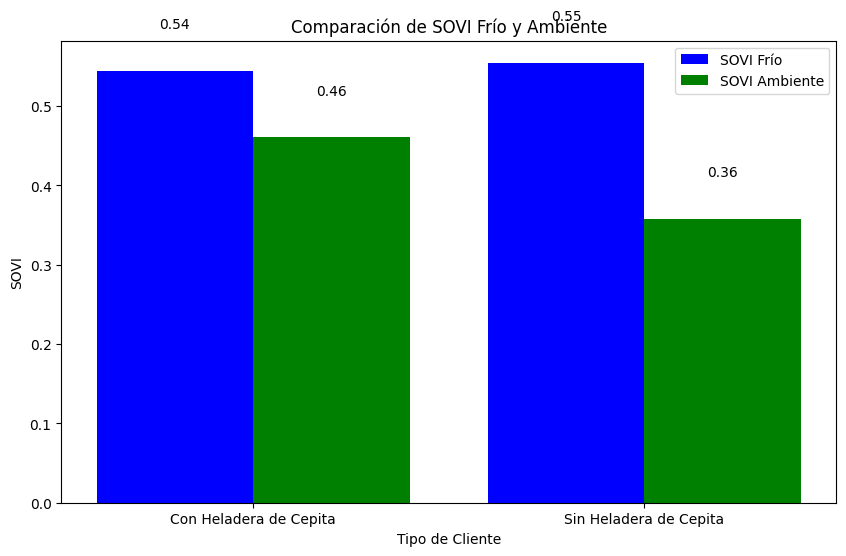

In [ ]:
import matplotlib.pyplot as plt

# Datos de SOVI de frío y ambiente para clientes con y sin heladera de Cepita
sovi_frio = [ce_cold_sovi, no_ce_cold_sovi]
sovi_ambiente = [ce_ambient_sovi, no_ce_ambient_sovi]

x = ['Con Heladera de Cepita', 'Sin Heladera de Cepita']

# Gráfico
plt.figure(figsize=(10, 6))

# Barras para SOVI Frío
plt.bar([i - 0.2 for i in range(len(x))], sovi_frio, width=0.4, label='SOVI Frío', color='blue')
# Barras para SOVI Ambiente
plt.bar([i + 0.2 for i in range(len(x))], sovi_ambiente, width=0.4, label='SOVI Ambiente', color='green')

# Agregar etiquetas de datos
for i in range(len(x)):
    plt.text(i - 0.2, sovi_frio[i] + 0.05, '{:.2f}'.format(sovi_frio[i]), ha='center', va='bottom')
    plt.text(i + 0.2, sovi_ambiente[i] + 0.05, '{:.2f}'.format(sovi_ambiente[i]), ha='center', va='bottom')

plt.xlabel('Tipo de Cliente')
plt.ylabel('SOVI')
plt.title('Comparación de SOVI Frío y Ambiente')
plt.xticks(range(len(x)), x)
plt.legend()

plt.show()


Notamos que los clientes con Heladera performan mejor en SOVI ambiente (paradojicamente) mientras que los Sin Heladeras performan mejor en SOVI FRIO.  Esto podría inferir que estamos ocupando las heladeras  propias de los clietnes lo que quiere decir que desplazamos a la competencia. Mientras que al instalar nuestras heladeras de Cepita, la competencia avanza sobre las heladeras de los clientes y perdemos en SOVI FRIO.

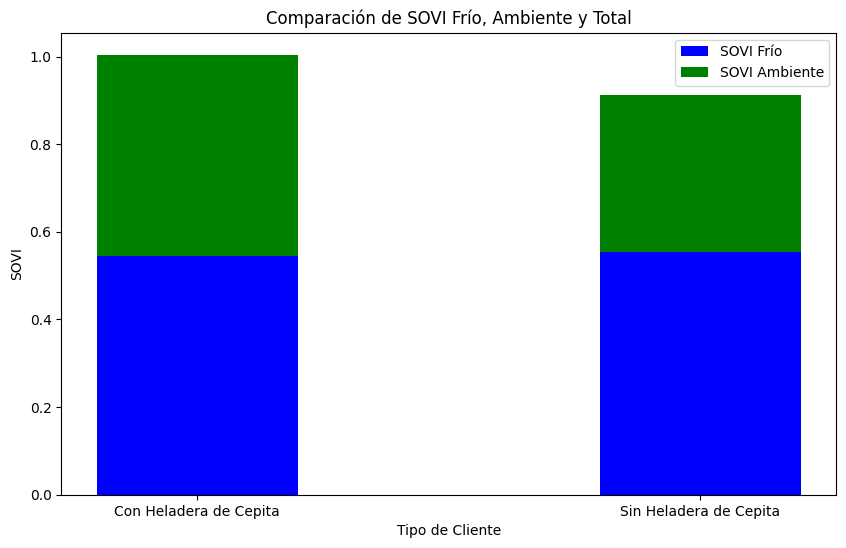

In [23]:
import matplotlib.pyplot as plt

# Datos de SOVI de frío y ambiente para clientes con y sin heladera de Cepita
sovi_frio = [ce_cold_sovi, no_ce_cold_sovi]
sovi_ambiente = [ce_ambient_sovi, no_ce_ambient_sovi]
sovi_total = [ce_cold_sovi + ce_ambient_sovi, no_ce_cold_sovi + no_ce_ambient_sovi]

x = ['Con Heladera de Cepita', 'Sin Heladera de Cepita']

# Gráfico
plt.figure(figsize=(10, 6))

# Graficar SOVI Frío
plt.bar(x, sovi_frio, width=0.4, label='SOVI Frío', color='blue', align='center')

# Graficar SOVI Ambiente encima de SOVI Frío
plt.bar(x, sovi_ambiente, width=0.4, label='SOVI Ambiente', color='green', align='center', bottom=sovi_frio)


plt.xlabel('Tipo de Cliente')
plt.ylabel('SOVI')
plt.title('Comparación de SOVI Frío, Ambiente y Total')
plt.legend()

plt.show()


Total de Frentes KO: 54689
Total de Frentes COMP: 61928
Total de Frentes KO para clientes con heladeras de CEPITA: 14818
Total de Frentes COMP para clientes con heladeras de CEPITA: 14923
Total de Frentes KO para clientes sin heladeras de CEPITA: 11550
Total de Frentes COMP para clientes sin heladeras de CEPITA: 12786
SOVI de STILLS KO para clientes con heladeras de CEPITA: 0.49823476009549106
SOVI de STILLS KO para clientes sin heladeras de CEPITA: 0.47460552268244577


<ipython-input-19-e71c2b25e96f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_cliente, y=sovi_total, palette='pastel')


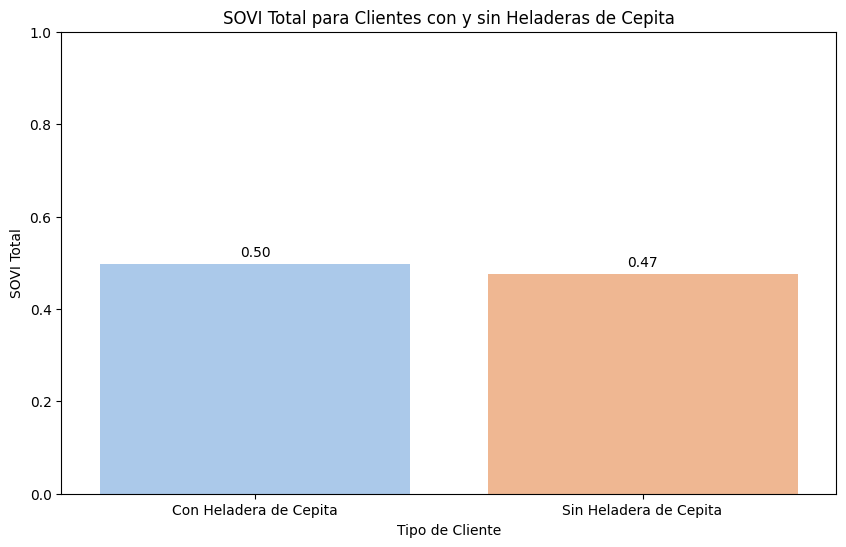

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular frentes KO totales y frentes COMP totales
total_fronts_ko = df[df['KO/COMP'] == 'KO']['fronts'].sum()
total_fronts_comp = df[df['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()

# Filtrar los datos para la categoría "STILL"
stills_data = df[df['Segmentos'] == 'STILL']

# Calcular frentes totales KO y COMP para clientes con heladeras y clientes sin heladeras
ce_total_fronts_ko = stills_data[(stills_data['EDF CEP'] == 1) & (stills_data['KO/COMP'] == 'KO')]['fronts'].sum()
no_ce_total_fronts_ko = stills_data[(stills_data['EDF CEP'] == 0) & (stills_data['KO/COMP'] == 'KO')]['fronts'].sum()

ce_total_fronts_comp = stills_data[(stills_data['EDF CEP'] == 1) & (stills_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()
no_ce_total_fronts_comp = stills_data[(stills_data['EDF CEP'] == 0) & (stills_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()

# Calcular el SOVI para clientes con heladeras y clientes sin heladeras
ce_sovi = ce_total_fronts_ko / (ce_total_fronts_ko + ce_total_fronts_comp) if (ce_total_fronts_ko + ce_total_fronts_comp) != 0 else 0
no_ce_sovi = no_ce_total_fronts_ko / (no_ce_total_fronts_ko + no_ce_total_fronts_comp) if (no_ce_total_fronts_ko + no_ce_total_fronts_comp) != 0 else 0

# Imprimir resultados
print("Total de Frentes KO:", total_fronts_ko)
print("Total de Frentes COMP:", total_fronts_comp)
print("Total de Frentes KO para clientes con heladeras de CEPITA:", ce_total_fronts_ko)
print("Total de Frentes COMP para clientes con heladeras de CEPITA:", ce_total_fronts_comp)
print("Total de Frentes KO para clientes sin heladeras de CEPITA:", no_ce_total_fronts_ko)
print("Total de Frentes COMP para clientes sin heladeras de CEPITA:", no_ce_total_fronts_comp)
print("SOVI de STILLS KO para clientes con heladeras de CEPITA:", ce_sovi)
print("SOVI de STILLS KO para clientes sin heladeras de CEPITA:", no_ce_sovi)

# Preparar datos para el gráfico
tipos_cliente = ['Con Heladera de Cepita', 'Sin Heladera de Cepita']
sovi_total = [ce_sovi, no_ce_sovi]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=tipos_cliente, y=sovi_total, palette='pastel')

# Añadir etiquetas
for i in range(len(tipos_cliente)):
    plt.text(i, sovi_total[i] + 0.01, '{:.2f}'.format(sovi_total[i]), ha='center', va='bottom')

plt.xlabel('Tipo de Cliente')
plt.ylabel('SOVI Total')
plt.title('SOVI Total para Clientes con y sin Heladeras de Cepita')

plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1 para SOVI
plt.show()


Aquí notamos que los clientes con Heladera performan mejor que los sin Heladeras, si miramos el SOVI total (sin discriminar entre frío y Ambiente)
Podemos concluir que la instalación de Heladeras mejora el SOVI en 3 puntos porcentuales, aunque liberamos espacios en heladeras propias de los clientes para que avance la competencia.  Deberíasmos reformular el plan para enteder si es conveniente o generar algún pacto con los clientes.

In [20]:
# Dividir el conjunto de datos original en subconjuntos
subsets = []

# Define el número de subconjuntos que deseas crear y el tamaño de cada subconjunto
num_subsets = 5
subset_size = len(df) // num_subsets

# Iterar para crear cada subconjunto
for i in range(num_subsets):
    # Obtener una muestra aleatoria de tamaño 'subset_size' del DataFrame original
    subset = df.sample(subset_size)
    subsets.append(subset)

# Ahora, ejecuta tu código en cada subconjunto y verifica los resultados
for i, subset in enumerate(subsets):
    print(f"Resultados para el subconjunto {i+1}:")
    # Aquí ejecuta tu código para calcular el SOVI y graficar los resultados usando 'subset'
    # Por ejemplo:
    total_fronts_ko = subset[subset['KO/COMP'] == 'KO']['fronts'].sum()
    total_fronts_comp = subset[subset['KO/COMP'] == 'COMPETENCIA']['fronts'].sum()
    # Luego sigue con el resto de tu código para calcular el SOVI y generar gráficos


Resultados para el subconjunto 1:
Resultados para el subconjunto 2:
Resultados para el subconjunto 3:
Resultados para el subconjunto 4:
Resultados para el subconjunto 5:


Puntuaciones de características para clientes con heladeras de CEPITA:
                   Feature      Score
0       ce_total_fronts_ko  67.626421
1     ce_total_fronts_comp  33.652488
2    no_ce_total_fronts_ko  29.962354
3  no_ce_total_fronts_comp  17.610287
Puntuaciones de características para clientes sin heladeras de CEPITA:
                   Feature      Score
0       ce_total_fronts_ko  68.035350
1     ce_total_fronts_comp  53.134841
2    no_ce_total_fronts_ko   2.150915
3  no_ce_total_fronts_comp   5.131350
Mean Squared Error (clientes con heladeras de CEPITA): 0.07222572815054595
R-squared (clientes con heladeras de CEPITA): 0.09394295956927079
Mean Squared Error (clientes sin heladeras de CEPITA): 0.1618085215277198
R-squared (clientes sin heladeras de CEPITA): -0.14694878841613646


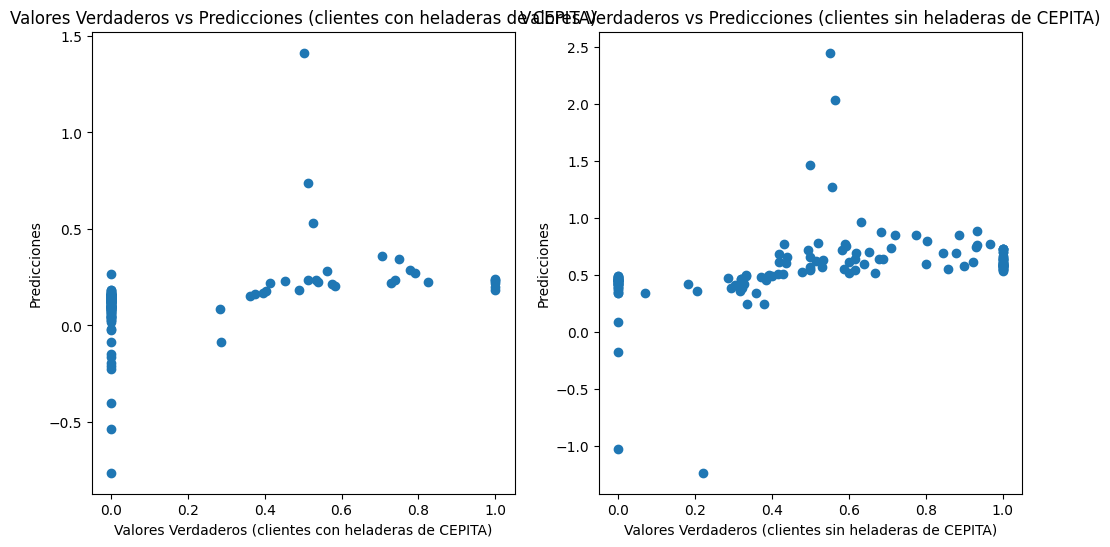

In [22]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponemos que el DataFrame 'df' ya ha sido cargado en los pasos anteriores

# 1. Calcular el SOVI individualmente para cada cliente

# Filtrar los datos para la categoría "STILL"
stills_data = df[df['Segmentos'] == 'STILL']

# Crear una lista para almacenar los resultados
results = []

# Iterar sobre los clientes únicos
for cliente in stills_data['Outnum'].unique():
    cliente_data = stills_data[stills_data['Outnum'] == cliente]
    ce_total_fronts_ko = cliente_data[(cliente_data['EDF CEP'] == 1) & (cliente_data['KO/COMP'] == 'KO')]['fronts'].sum()
    ce_total_fronts_comp = cliente_data[(cliente_data['EDF CEP'] == 1) & (cliente_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()
    no_ce_total_fronts_ko = cliente_data[(cliente_data['EDF CEP'] == 0) & (cliente_data['KO/COMP'] == 'KO')]['fronts'].sum()
    no_ce_total_fronts_comp = cliente_data[(cliente_data['EDF CEP'] == 0) & (cliente_data['KO/COMP'] == 'COMPETENCIA')]['fronts'].sum()

    ce_sovi = ce_total_fronts_ko / (ce_total_fronts_ko + ce_total_fronts_comp) if (ce_total_fronts_ko + ce_total_fronts_comp) != 0 else 0
    no_ce_sovi = no_ce_total_fronts_ko / (no_ce_total_fronts_ko + no_ce_total_fronts_comp) if (no_ce_total_fronts_ko + no_ce_total_fronts_comp) != 0 else 0

    results.append({
        'Outnum': cliente,
        'ce_sovi': ce_sovi,
        'no_ce_sovi': no_ce_sovi,
        'ce_total_fronts_ko': ce_total_fronts_ko,
        'ce_total_fronts_comp': ce_total_fronts_comp,
        'no_ce_total_fronts_ko': no_ce_total_fronts_ko,
        'no_ce_total_fronts_comp': no_ce_total_fronts_comp
    })

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# 2. Crear un DataFrame con las características relevantes

X = results_df[['ce_total_fronts_ko', 'ce_total_fronts_comp', 'no_ce_total_fronts_ko', 'no_ce_total_fronts_comp']]
y_ce = results_df['ce_sovi']
y_no_ce = results_df['no_ce_sovi']

# 3. Seleccionar las mejores características

# Selección para clientes con heladeras de CEPITA
selector_ce = SelectKBest(score_func=f_regression, k='all')
selector_ce.fit(X, y_ce)
X_new_ce = selector_ce.transform(X)

# Selección para clientes sin heladeras de CEPITA
selector_no_ce = SelectKBest(score_func=f_regression, k='all')
selector_no_ce.fit(X, y_no_ce)
X_new_no_ce = selector_no_ce.transform(X)

# Visualizar las puntuaciones de las características
feature_scores_ce = pd.DataFrame({'Feature': X.columns, 'Score': selector_ce.scores_})
feature_scores_no_ce = pd.DataFrame({'Feature': X.columns, 'Score': selector_no_ce.scores_})

print("Puntuaciones de características para clientes con heladeras de CEPITA:")
print(feature_scores_ce)

print("Puntuaciones de características para clientes sin heladeras de CEPITA:")
print(feature_scores_no_ce)

# 4. Entrenamiento del Modelo

# Dividir los datos en conjuntos de entrenamiento y prueba para clientes con heladeras de CEPITA
X_train_ce, X_test_ce, y_train_ce, y_test_ce = train_test_split(X_new_ce, y_ce, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión lineal para clientes con heladeras de CEPITA
model_ce = LinearRegression()
model_ce.fit(X_train_ce, y_train_ce)

# Dividir los datos en conjuntos de entrenamiento y prueba para clientes sin heladeras de CEPITA
X_train_no_ce, X_test_no_ce, y_train_no_ce, y_test_no_ce = train_test_split(X_new_no_ce, y_no_ce, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión lineal para clientes sin heladeras de CEPITA
model_no_ce = LinearRegression()
model_no_ce.fit(X_train_no_ce, y_train_no_ce)

# 5. Evaluación del Modelo

# Hacer predicciones para clientes con heladeras de CEPITA
y_pred_ce = model_ce.predict(X_test_ce)

# Calcular métricas de evaluación para clientes con heladeras de CEPITA
mse_ce = mean_squared_error(y_test_ce, y_pred_ce)
r2_ce = r2_score(y_test_ce, y_pred_ce)

print(f'Mean Squared Error (clientes con heladeras de CEPITA): {mse_ce}')
print(f'R-squared (clientes con heladeras de CEPITA): {r2_ce}')

# Hacer predicciones para clientes sin heladeras de CEPITA
y_pred_no_ce = model_no_ce.predict(X_test_no_ce)

# Calcular métricas de evaluación para clientes sin heladeras de CEPITA
mse_no_ce = mean_squared_error(y_test_no_ce, y_pred_no_ce)
r2_no_ce = r2_score(y_test_no_ce, y_pred_no_ce)

print(f'Mean Squared Error (clientes sin heladeras de CEPITA): {mse_no_ce}')
print(f'R-squared (clientes sin heladeras de CEPITA): {r2_no_ce}')

# Visualización de las predicciones
plt.figure(figsize=(12, 6))

# Gráfico para clientes con heladeras de CEPITA
plt.subplot(1, 2, 1)
plt.scatter(y_test_ce, y_pred_ce)
plt.xlabel('Valores Verdaderos (clientes con heladeras de CEPITA)')
plt.ylabel('Predicciones')
plt.title('Valores Verdaderos vs Predicciones (clientes con heladeras de CEPITA)')

# Gráfico para clientes sin heladeras de CEPITA
plt.subplot(1, 2, 2)
plt.scatter(y_test_no_ce, y_pred_no_ce)
plt.xlabel('Valores Verdaderos (clientes sin heladeras de CEPITA)')
plt.ylabel('Predicciones')
plt.title('Valores Verdaderos vs Predicciones (clientes sin heladeras de CEPITA)')

plt.show()


Explicación Detallada:
Calcular el SOVI individualmente para cada cliente: Este paso asegura que X y y tienen el mismo número de muestras.
Crear un DataFrame con las características relevantes: Aquí, construimos X con las características relevantes y y con los valores SOVI calculados.
Seleccionar las mejores características: Usamos SelectKBest para seleccionar las mejores características basadas en su puntuación.
Entrenar el modelo de regresión: Entrenamos un modelo de regresión lineal para clientes con y sin heladeras de CEPITA.
Evaluar el modelo: Calculamos métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el desempeño del modelo.
Generar conclusiones: Resumimos los hallazgos y proporcionamos recomendaciones basadas en los resultados del análisis.
Este esquema debería funcionar correctamente utilizando las variables calculadas previamente y proporcionar una evaluación precisa del impacto de las heladeras de CEPITA en el SOVI.







### Interpretación de los Resultados

#### Puntuaciones de Características

Las puntuaciones de características (`Feature Scores`) indican la importancia relativa de cada característica en la predicción del SOVI (Share of Visible Inventory). Una puntuación más alta significa que la característica es más importante para el modelo.

##### Clientes con Heladeras de CEPITA:

1. **ce_total_fronts_ko (67.626421)**: Esta es la característica más importante. Indica que la cantidad total de frentes KO en clientes con heladeras de CEPITA tiene una fuerte influencia en el SOVI.
2. **ce_total_fronts_comp (33.652488)**: La segunda característica más importante. Indica que la cantidad total de frentes de la competencia en clientes con heladeras de CEPITA también afecta significativamente el SOVI, aunque no tanto como los frentes KO.
3. **no_ce_total_fronts_ko (29.962354)**: También es relevante, aunque menos que las anteriores, y refleja la influencia de los frentes KO en clientes sin heladeras de CEPITA.
4. **no_ce_total_fronts_comp (17.610287)**: Es la característica menos importante entre las cuatro, pero aún relevante. Representa la influencia de los frentes de la competencia en clientes sin heladeras de CEPITA.

##### Clientes sin Heladeras de CEPITA:

1. **ce_total_fronts_ko (68.035350)**: Nuevamente, esta es la característica más importante. Esto sugiere que la presencia de frentes KO en los datos de clientes sin heladeras de CEPITA es crucial para el SOVI.
2. **ce_total_fronts_comp (53.134841)**: También es muy importante, indicando que los frentes de la competencia influyen fuertemente en el SOVI de estos clientes.
3. **no_ce_total_fronts_ko (2.150915)**: Es menos importante para este grupo de clientes, lo que sugiere que la cantidad de frentes KO en clientes sin heladeras de CEPITA no afecta tanto al SOVI.
4. **no_ce_total_fronts_comp (5.131350)**: Tiene una importancia baja, indicando que los frentes de la competencia en clientes sin heladeras de CEPITA tienen un impacto limitado en el SOVI.

#### Métricas de Evaluación del Modelo

##### Clientes con Heladeras de CEPITA:

1. **Mean Squared Error (MSE): 0.07222572815054595**: El MSE indica el promedio de los errores cuadrados. Un valor más bajo es mejor, y este valor sugiere que el modelo no está tan lejos de las predicciones correctas.
2. **R-squared (R²): 0.09394295956927079**: El R² indica qué proporción de la varianza en la variable dependiente es explicada por las variables independientes. Un valor de 0.0939 sugiere que el modelo explica solo el 9.39% de la variabilidad del SOVI para clientes con heladeras de CEPITA, lo cual es relativamente bajo y sugiere que el modelo podría ser mejorado.

##### Clientes sin Heladeras de CEPITA:

1. **Mean Squared Error (MSE): 0.1618085215277198**: Un valor más alto que el de los clientes con heladeras de CEPITA, indicando que el modelo tiene mayor error de predicción para este grupo de clientes.
2. **R-squared (R²): -0.14694878841613646**: Un valor negativo de R² indica que el modelo no es bueno para explicar la variabilidad del SOVI para clientes sin heladeras de CEPITA y que en realidad es peor que un modelo que simplemente predice el promedio del SOVI.

### Conclusiones

1. **Importancia de las Características**:
   - Para ambos grupos de clientes, la cantidad de frentes KO y de la competencia en los clientes con heladeras de CEPITA son las características más importantes.
   - Las características relacionadas con los frentes de clientes sin heladeras de CEPITA tienen menor importancia, especialmente para el grupo de clientes sin heladeras de CEPITA.

2. **Desempeño del Modelo**:
   - El modelo tiene un mejor desempeño (menor MSE) y explica más variabilidad (mayor R²) para los clientes con heladeras de CEPITA en comparación con los clientes sin heladeras de CEPITA.
   - Sin embargo, el R² es bajo para ambos grupos, sugiriendo que hay otros factores no considerados en el modelo que podrían influir en el SOVI.

3. **Recomendaciones**:
   - Se debe considerar la inclusión de otras variables o características adicionales para mejorar el desempeño del modelo, especialmente para los clientes sin heladeras de CEPITA.
   - Podría ser útil realizar un análisis más detallado para identificar qué otras variables podrían estar influyendo en el SOVI.
   - Dado que la presencia de frentes KO en clientes con heladeras de CEPITA tiene un fuerte impacto, se recomienda seguir priorizando la instalación de heladeras de CEPITA en clientes estratégicos.

Estos hallazgos proporcionan una base para seguir optimizando la estrategia de distribución de frentes y heladeras para maximizar el SOVI.